<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-09-14 04:07:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.11.207, 192.178.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   219MB/s    in 0.5s    

2025-09-14 04:07:55 (219 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

In [ ]:
#walkthrough diretory and and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directtories and {len(filenames)} images in '{dirpath}'.")

There are 2 directtories and 0 images in 'pizza_steak'.
There are 2 directtories and 0 images in 'pizza_steak/train'.
There are 0 directtories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directtories and 750 images in 'pizza_steak/train/steak'.
There are 2 directtories and 0 images in 'pizza_steak/test'.
There are 0 directtories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directtories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# Lets now visualize images but before that lets get the class_names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Lets now visualize images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir,target_class):
    # Setup target directory
    target_folder=target_dir+target_class
    # get a random image for directory
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    # read the image and plot it
    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f'Image shape : {img.shape}')


['1548239.jpg']
Image shape : (512, 306, 3)


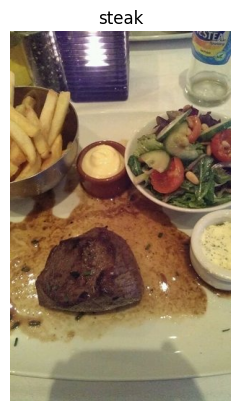

In [ ]:
view_random_image(target_dir='pizza_steak/train/',target_class='steak')

**Other way for writing this function can be as shown below**

In [ ]:
def plot_random_images(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.choice(os.listdir(target_folder))
    print(random_image)

    # Read and load our image
    image=mpimg.imread(target_folder+"/"+random_image)
    print(f'Image Shape {image.shape}')
    plt.imshow(image)
    plt.title(target_class)
    plt.axis('off')
    return image

1344966.jpg
Image Shape (512, 512, 3)


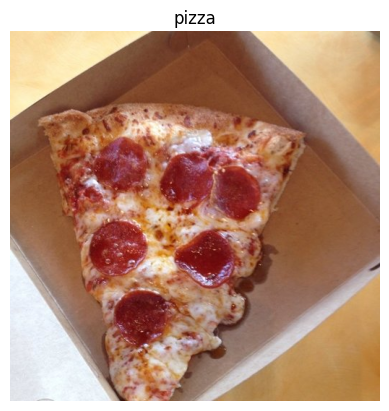

In [ ]:
img=plot_random_images('pizza_steak/train/','pizza')

In [ ]:
print(img)

[[[250 219 162]
  [249 218 161]
  [247 216 159]
  ...
  [126  99  72]
  [124  99  69]
  [123  98  68]]

 [[247 216 159]
  [246 215 158]
  [245 214 157]
  ...
  [124  98  71]
  [125 100  70]
  [125 100  70]]

 [[245 214 157]
  [245 214 157]
  [245 214 157]
  ...
  [123  99  71]
  [123 100  69]
  [122  99  68]]

 ...

 [[226 229 234]
  [227 230 235]
  [228 231 236]
  ...
  [186 132  68]
  [185 131  67]
  [185 131  67]]

 [[224 227 232]
  [226 229 234]
  [228 231 236]
  ...
  [188 133  69]
  [187 132  68]
  [186 131  67]]

 [[219 222 227]
  [222 225 230]
  [226 229 234]
  ...
  [189 134  70]
  [188 133  69]
  [187 132  68]]]


In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[250, 219, 162],
        [249, 218, 161],
        [247, 216, 159],
        ...,
        [126,  99,  72],
        [124,  99,  69],
        [123,  98,  68]],

       [[247, 216, 159],
        [246, 215, 158],
        [245, 214, 157],
        ...,
        [124,  98,  71],
        [125, 100,  70],
        [125, 100,  70]],

       [[245, 214, 157],
        [245, 214, 157],
        [245, 214, 157],
        ...,
        [123,  99,  71],
        [123, 100,  69],
        [122,  99,  68]],

       ...,

       [[226, 229, 234],
        [227, 230, 235],
        [228, 231, 236],
        ...,
        [186, 132,  68],
        [185, 131,  67],
        [185, 131,  67]],

       [[224, 227, 232],
        [226, 229, 234],
        [228, 231, 236],
        ...,
        [188, 133,  69],
        [187, 132,  68],
        [186, 131,  67]],

       [[219, 222, 227],
        [222, 225, 230],
        [226, 229, 234],
        ...,
        [189, 134,  7

Lets see what shape image is

In [ ]:
img.shape

(512, 512, 3)

💚 Neural Networks love normalized or scaled data so lets do it

In [ ]:
img/255.0  # This normalizes pixel values for a single image

array([[[0.98039216, 0.85882353, 0.63529412],
        [0.97647059, 0.85490196, 0.63137255],
        [0.96862745, 0.84705882, 0.62352941],
        ...,
        [0.49411765, 0.38823529, 0.28235294],
        [0.48627451, 0.38823529, 0.27058824],
        [0.48235294, 0.38431373, 0.26666667]],

       [[0.96862745, 0.84705882, 0.62352941],
        [0.96470588, 0.84313725, 0.61960784],
        [0.96078431, 0.83921569, 0.61568627],
        ...,
        [0.48627451, 0.38431373, 0.27843137],
        [0.49019608, 0.39215686, 0.2745098 ],
        [0.49019608, 0.39215686, 0.2745098 ]],

       [[0.96078431, 0.83921569, 0.61568627],
        [0.96078431, 0.83921569, 0.61568627],
        [0.96078431, 0.83921569, 0.61568627],
        ...,
        [0.48235294, 0.38823529, 0.27843137],
        [0.48235294, 0.39215686, 0.27058824],
        [0.47843137, 0.38823529, 0.26666667]],

       ...,

       [[0.88627451, 0.89803922, 0.91764706],
        [0.89019608, 0.90196078, 0.92156863],
        [0.89411765, 0

# **Lets Start creating end to end**
* From Begining

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zipfile_ref=zipfile.ZipFile('pizza_steak.zip')
zipfile_ref.extractall()
zipfile_ref.close()

--2025-09-14 04:08:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   260MB/s    in 0.4s    

2025-09-14 04:08:05 (260 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255)
valid_datagen=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [ ]:
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',batch_size=32)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# **Model Creation Starts**

In [ ]:
tf.random.set_seed(42)

model1=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.6274 - loss: 0.7462 - val_accuracy: 0.8220 - val_loss: 0.4397
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.7965 - loss: 0.4404 - val_accuracy: 0.8160 - val_loss: 0.4277
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.8350 - loss: 0.3765 - val_accuracy: 0.8080 - val_loss: 0.4206
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8594 - loss: 0.3245 - val_accuracy: 0.7720 - val_loss: 0.5085
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9270 - loss: 0.2193 - val_accuracy: 0.8300 - val_loss: 0.4151


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

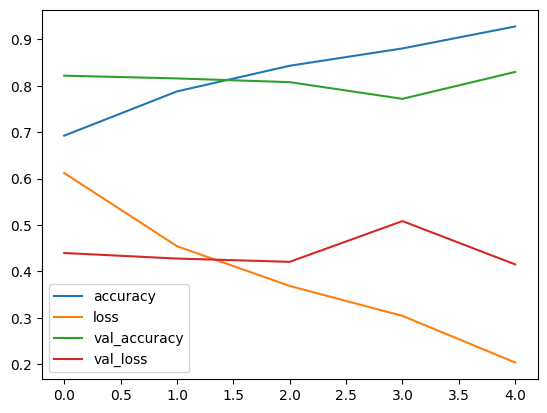

In [ ]:
pd.DataFrame(history1.history).plot()

Lets now try to fit it on they [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69543&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) Model Non CNN model on image data

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history2=model2.fit(train_data,validation_data=valid_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.5248 - loss: 1.0162 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.5129 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.4839 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4801 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

# **Lets Now Improve our Model Non CNN Model**

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(train_data,validation_data=valid_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.6193 - loss: 6.2974 - val_accuracy: 0.7340 - val_loss: 0.6705
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7380 - loss: 0.6516 - val_accuracy: 0.6840 - val_loss: 0.8112
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.6926 - loss: 0.8123 - val_accuracy: 0.8060 - val_loss: 0.4277
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7522 - loss: 0.5524 - val_accuracy: 0.7520 - val_loss: 0.5250
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8099 - loss: 0.4380 - val_accuracy: 0.5460 - val_loss: 1.3754


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

Visualize or becoming one with *data*

['213765.jpg']
Image shape : (384, 512, 3)
['1403878.jpg']
Image shape : (512, 512, 3)


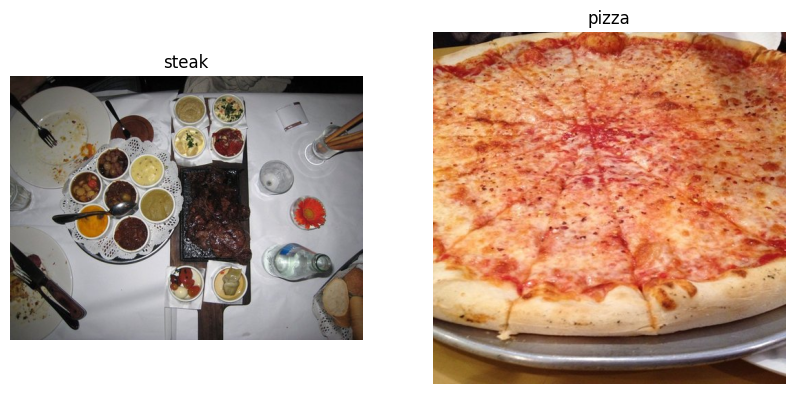

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2,)
pizza_img=view_random_image('pizza_steak/train/','pizza')

# **Preprocess Data**

In [ ]:
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=train_data_gen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode='binary')
test_data=test_data_gen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Create a CNN Model with a baseline**

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential,Input

In [ ]:
model_baseline=Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=10,kernel_size=3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_baseline.compile(loss='binary_crossentropy',
                       optimizer=Adam(),
                       metrics=['accuracy'])

In [ ]:
history_bl=model_baseline.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.5525 - loss: 1.4430 - val_accuracy: 0.7480 - val_loss: 0.5000
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.8313 - loss: 0.4304 - val_accuracy: 0.7640 - val_loss: 0.4752
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.9057 - loss: 0.2736 - val_accuracy: 0.8040 - val_loss: 0.4244
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.9709 - loss: 0.1195 - val_accuracy: 0.8020 - val_loss: 0.4836
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9915 - loss: 0.0509 - val_accuracy: 0.7920 - val_loss: 0.6080


In [ ]:
model_baseline.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7989 - loss: 0.5545


[0.6080348491668701, 0.7919999957084656]

In [ ]:
model_baseline.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

#  **Evaluating Our CNN's Training Curves**

<Axes: >

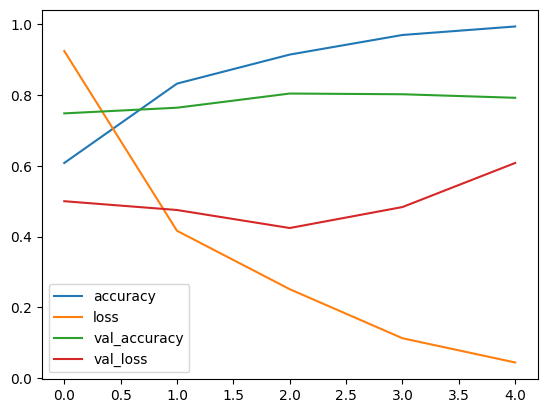

In [ ]:
pd.DataFrame(history_bl.history).plot()

# **Plot validation and traning curves seperately**

In [ ]:
def plot_loss_curves(history):

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(len(history.history['loss']))
    # Plot Loss
    plt.plot(epochs,loss,label='Training Loss')
    plt.plot(epochs,val_loss,label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.axis(True)
    plt.legend()
    # Plot Acuracy
    plt.figure()
    plt.plot(epochs,accuracy,label='Training accuracy')
    plt.plot(epochs,val_accuracy,label='Validation Accuracy')
    plt.title('Accuracy')
    plt.axis(True)
    plt.legend()

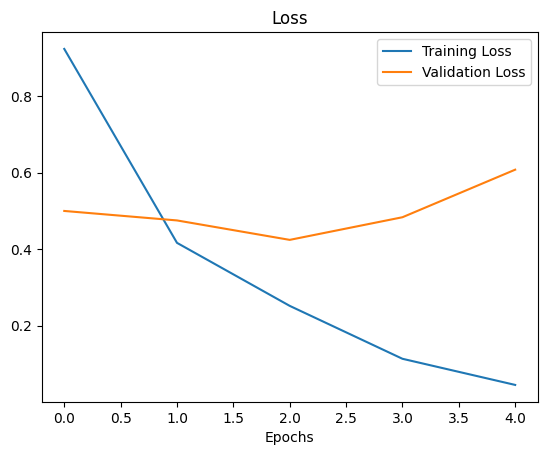

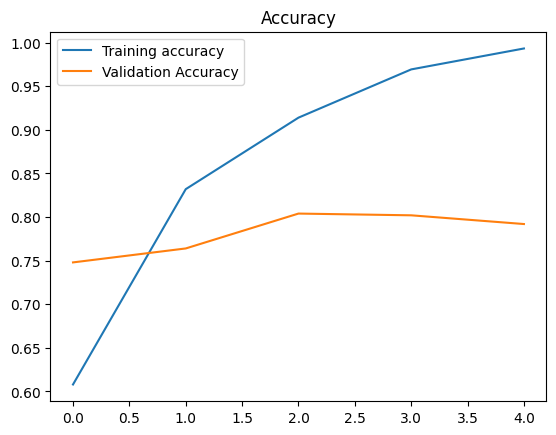

In [ ]:
plot_loss_curves(history_bl)

# **Reducing overfitting with MaxPool2D**
**Ways to Increase Overfitting**
>* increase number of conv layers
>* increase number of filters
>* add another Dense Layer to the output of the flattened layer


**Ways to Reduce Overfitting**
>* Data Augmentation
>* Add Regularization (L1,L2,MaxPool2D)
>* add more data


In [ ]:
# Creating a new baseline
model_n=Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_n.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_new_baseline=model_n.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_split=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.6036 - loss: 0.6570 - val_accuracy: 0.7740 - val_loss: 0.4822
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7727 - loss: 0.4830 - val_accuracy: 0.8160 - val_loss: 0.4065
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8170 - loss: 0.4307 - val_accuracy: 0.8340 - val_loss: 0.3925
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.8340 - loss: 0.3913 - val_accuracy: 0.8640 - val_loss: 0.3488
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8631 - loss: 0.3515 - val_accuracy: 0.8640 - val_loss: 0.3415


In [ ]:
model_n.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8542 - loss: 0.3334


[0.3414584994316101, 0.8640000224113464]

In [ ]:
model_n.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

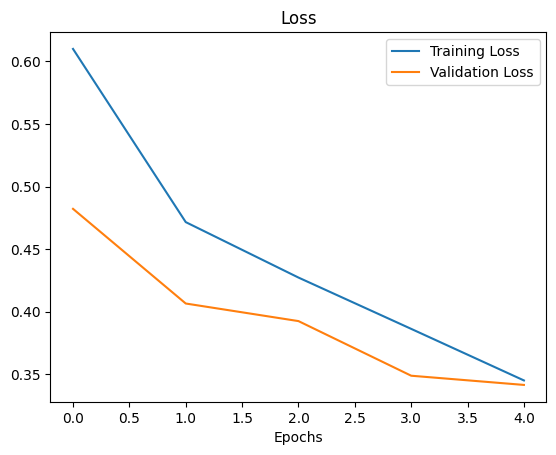

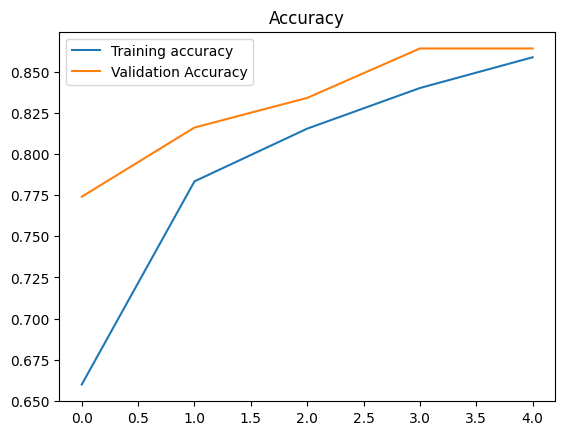

In [ ]:
plot_loss_curves(history_new_baseline)

# **Reducing Overfitting with Dataset Augmentation**

In [ ]:
# Training Data Augmented
train_data_GEN_augmented=ImageDataGenerator(rescale=1/255,rotation_range=0.2,width_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,height_shift_range=0.2)

# training Image dataset with no augmentation
train_datagen=ImageDataGenerator(rescale=1/255)
# testing Image dataset with no augmentation
test_data_gen=ImageDataGenerator(rescale=1/255)

# ***Visualize some augmented data***

In [ ]:
print('Augmented Training data:  ')
train_data_augmented=train_data_GEN_augmented.flow_from_directory(train_dir,class_mode='binary',shuffle=False,batch_size=32,target_size=(224,224))

print('Non augmented Training Data: ')
train_data=train_data_gen.flow_from_directory(train_dir,class_mode='binary',shuffle=False,batch_size=32,target_size=(224,224))

print('non augmented test dataset :')
test_data=test_data_gen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary')



Augmented Training data:  
Found 1500 images belonging to 2 classes.
Non augmented Training Data: 
Found 1500 images belonging to 2 classes.
non augmented test dataset :
Found 500 images belonging to 2 classes.


In [ ]:
# Now lets visualize some of the images
images,labels=next(train_data)
images_augmented,labels_for_augmented=next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

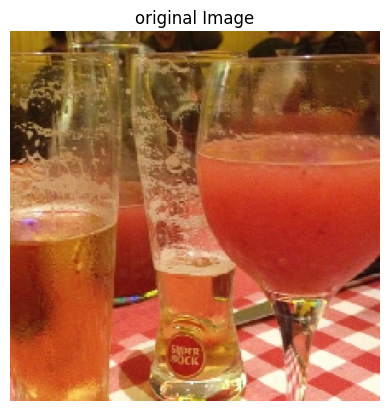

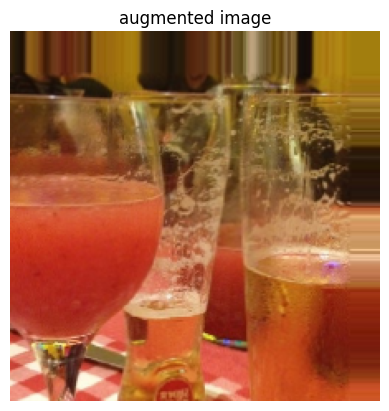

In [ ]:
import random
i=random.randint(0,32)
plt.imshow(images[i])
plt.title('original Image')
plt.axis(False)

plt.figure()
plt.imshow(images_augmented[i])
plt.title('augmented image')
plt.axis(False)

**Lets Train our model on augmented Data**

In [ ]:
model_aug=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_aug.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
history_aug=model_aug.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 448ms/step - accuracy: 0.5109 - loss: 0.7964 - val_accuracy: 0.5060 - val_loss: 0.6879
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.5464 - loss: 0.6935 - val_accuracy: 0.7740 - val_loss: 0.6454
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 422ms/step - accuracy: 0.6706 - loss: 0.6618 - val_accuracy: 0.7020 - val_loss: 0.5932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 0.6574 - loss: 0.6442 - val_accuracy: 0.7440 - val_loss: 0.5765
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 440ms/step - accuracy: 0.7125 - loss: 0.6051 - val_accuracy: 0.7200 - val_loss: 0.5345


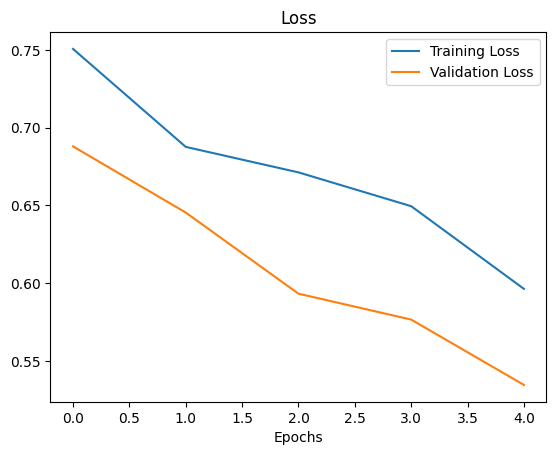

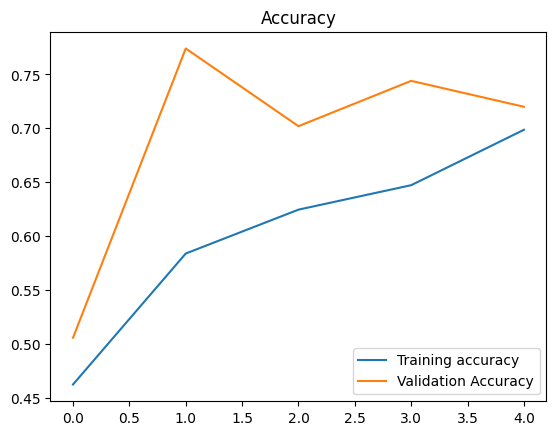

In [ ]:
plot_loss_curves(history_aug)

**Lets Try again but this time lets shuffule and augment the data**

In [ ]:
train_data_augmented_shuffled=train_data_GEN_augmented.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',batch_size=32,shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
history_7=model_7.fit(train_data_augmented_shuffled,epochs=5,steps_per_epoch=len(train_data_augmented_shuffled),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 459ms/step - accuracy: 0.6007 - loss: 0.6608 - val_accuracy: 0.7720 - val_loss: 0.5293
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step - accuracy: 0.6994 - loss: 0.5913 - val_accuracy: 0.7760 - val_loss: 0.4403
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.7392 - loss: 0.5273 - val_accuracy: 0.8340 - val_loss: 0.4040
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 423ms/step - accuracy: 0.7510 - loss: 0.5007 - val_accuracy: 0.8500 - val_loss: 0.3821
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.7668 - loss: 0.4967 - val_accuracy: 0.7880 - val_loss: 0.4261


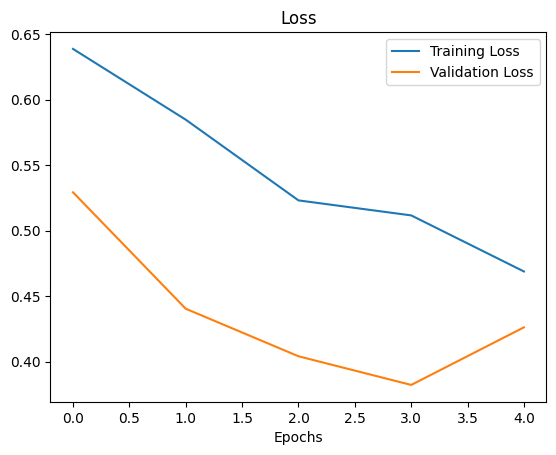

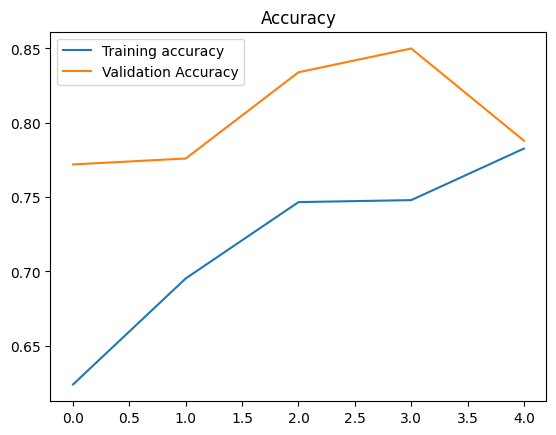

In [ ]:
plot_loss_curves(history_7)

**Making a prediction on our custom downloaded image**

In [7]:
import matplotlib.pyplot as plt

In [8]:
from matplotlib import image as mpimg

In [9]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg

--2025-09-14 05:57:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-09-14 05:57:22 (40.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



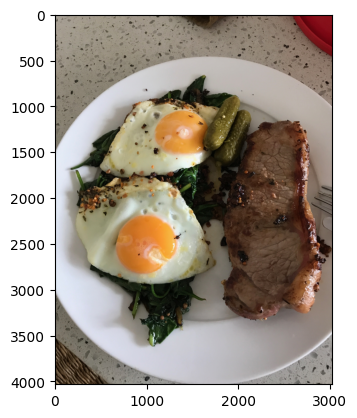

In [10]:
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)

In [11]:
steak.shape

(4032, 3024, 3)